## Website Satisfaction Survey Analysis

Results of user survey of an ecommerce website is given. The purpose of this project is to analyze the survey results and identify insights about the user experience of using the website.

The dataset consists of user responses to 26 questions related to website such as typography, information/content, color, etc. A 10-point Likert Scale is used to respond to the questions. The dataset is available at https://www.kaggle.com/datasets/hayriyigit/website-satisfaction-survey.

Factor Analysis is conducted to understand the latent factors of these observed variables and interpret the results.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
# Read dataset
df = pd.read_csv("survey.csv", header=0)
df.head()

,user_id,language,platform,gender,age,q1,q2,q3,q4,q5,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
0,080c468b-27c0-455c-aa63-b8f807f2e3d7,en,Desktop,male,34,9,7,6,6,7,...,8,4,6,5,6,6,5,2,5,3
1,0b0379c7-04db-4c85-84bd-a2bd55329e29,en,Mobile,female,19,10,10,10,9,10,...,10,10,10,10,10,10,10,10,9,8
2,0e623280-b28b-4d4a-8eea-0732f09ed497,en,Mobile,female,19,10,10,10,10,10,...,9,8,10,10,10,10,9,9,8,8
3,045dc0f3-a730-4d03-a615-f51814e5b04f,en,Mobile,male,21,5,8,5,5,5,...,7,9,10,8,8,10,10,8,10,6
4,092f2ee7-5281-4a09-9bce-e5523b95b53b,en,NaN,female,53,9,10,9,10,9,...,7,8,8,8,9,9,10,10,10,10


#### Questions (10-point Likert scale):

Following are the questions numbered q1, q2...q26 in the dataset.
**Typography**

q1: It is easy to read the text on this website with the used font type and size.

q2: The font color is appealing on this website.

q3: The text alignment and spacing on this website make the text easy to read.


**Color**

q4: The color scheme of this website is appealing.

q5: The use of color or graphics enhances navigation.


**Content/information quality**

q6: The information content helps in buying decisions by comparing the information about products or services.

q7: The information content provided by this website meets my needs.

q8: Contents and information support for reading and learning about buying process.


**Interactivity**

q9: This website provides adequate feedback to assess my progression when I perform a task.

q10: This website offers customization.

q11: This website offers versatility of ordering process.

q12: This website provides content tailored to the individual.

q13: In this website everything is consistent.

**Navigation**

q14: Navigation aids serve as a logical road map for buying.

q15: Obviousness of buying button and links in this website.

q16: It is easy to personalize or to narrow buying process.

q17: It is easy to learn to use the website.

q18: This website supports reversibility of action.

**Satisfaction**

q19: Overall I am satisfied with the interface of this website.

q20: My current experience with this website is satisfactory.

q21: Overall. I am satisfied with the amount of time it took to complete the tasks for buying products.

q22: Overall. I am satisfied with accuracy for this website related to the buying process.

**Trust**

q23: I trust the information presented on this website.

q24: This website is credible for me.

**Loyalty**

q25: I would visit this website again.

q26: I would recommend this website to my friend.

In [3]:
# Drop all columns other than survey question responses
survey_df = df.drop(columns=['user_id', 'language', 'platform', 'gender', 'age'])
survey_df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
0,9,7,6,6,7,7,6,6,5,5,...,8,4,6,5,6,6,5,2,5,3
1,10,10,10,9,10,10,10,10,9,10,...,10,10,10,10,10,10,10,10,9,8
2,10,10,10,10,10,10,10,10,10,10,...,9,8,10,10,10,10,9,9,8,8
3,5,8,5,5,5,5,5,6,6,8,...,7,9,10,8,8,10,10,8,10,6
4,9,10,9,10,9,7,8,5,7,8,...,7,8,8,8,9,9,10,10,10,10


In [4]:
print('Responses of {} users are available.'.format(survey_df.shape[0]))

Responses of 73 users are available.


### Adequact Test
Barlett's Sphericity Test and Kaiser-Meyer-Olkin (KMO) Test are conducted to evaluate the factorability of the dataset.

**Bartlett’s test of sphericity** checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

**Kaiser-Meyer-Olkin (KMO) Test** measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [5]:
chi_square_value,p_value=calculate_bartlett_sphericity(survey_df)
chi_square_value, p_value

(1623.2402072039602, 1.237683544235418e-171)

In [6]:
kmo_all,kmo_model=calculate_kmo(survey_df)
kmo_model

0.8647611342607665

Here, p-value of Barlett's test is very low and kmo-score is 0.86 (>0.6). Hence factor analysis can be conducted.

### Determine number of factors

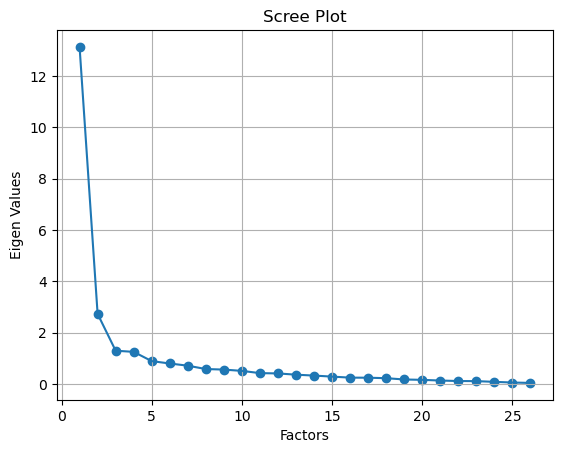

In [7]:
fa = FactorAnalyzer(n_factors=survey_df.shape[1], rotation=None)
fa.fit(survey_df)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1, survey_df.shape[1]+1),ev)
plt.plot(range(1, survey_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Values')
plt.grid()
plt.show()

In [8]:
'''
 From the Scree plot above, 5 factors are found to have eigen values more than 1 (or close to 1). 
 5 factors and varimax rotation is used to fit factor_analyzer and calculate loadings
'''
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(survey_df)
loadings_df = pd.DataFrame(fa.loadings_,index=survey_df.columns)
loadings_df

,0,1,2,3,4
q1,0.099961,0.774357,-0.079795,0.321797,0.015576
q2,0.178909,0.836019,0.135454,0.101916,0.063459
q3,0.041438,0.713113,0.055440,0.095694,0.254581
q4,0.146058,0.811110,0.070999,-0.031095,0.166014
q5,0.202457,0.655376,0.237125,0.362648,0.002515
q6,0.239624,0.122927,0.257562,0.802537,0.059995
q7,0.436143,0.237686,0.090813,0.621522,0.151444
q8,0.201393,0.286128,0.332926,0.520492,0.355756
q9,0.253617,0.030815,0.584818,0.208287,0.250758
q10,0.333174,0.045337,0.656804,0.164210,0.182566


In [9]:
# The variance explained by each factor, the proportion of explained variance and cumulative variance are calculated.
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4
Variance          5.042858  3.941067  3.663663  3.165203  2.020688
Proportional Var  0.193956  0.151579  0.140910  0.121739  0.077719
Cumulative Var    0.193956  0.345536  0.486446  0.608184  0.685903


In [10]:
# The communalities of each question is calculated
print(pd.DataFrame(fa.get_communalities(),index=survey_df.columns,columns=['Communalities']))

     Communalities
q1        0.719784
q2        0.763698
q3        0.587289
q4        0.712800
q5        0.658255
q6        0.786534
q7        0.664188
q8        0.630742
q9        0.513547
q10       0.604748
q11       0.667696
q12       0.899296
q13       0.577711
q14       0.565546
q15       0.623808
q16       0.646538
q17       0.736405
q18       0.475018
q19       0.698971
q20       0.794353
q21       0.706602
q22       0.843083
q23       0.766267
q24       0.768617
q25       0.698338
q26       0.723643


In [11]:
# In order to find the variables that contribute significantly to each factor, a threshold of 0.5 is used.
loadings_df.where(abs(loadings_df) > 0.5)

,0,1,2,3,4
q1,NaN,0.774357,NaN,NaN,NaN
q2,NaN,0.836019,NaN,NaN,NaN
q3,NaN,0.713113,NaN,NaN,NaN
q4,NaN,0.811110,NaN,NaN,NaN
q5,NaN,0.655376,NaN,NaN,NaN
q6,NaN,NaN,NaN,0.802537,NaN
q7,NaN,NaN,NaN,0.621522,NaN
q8,NaN,NaN,NaN,0.520492,NaN
q9,NaN,NaN,0.584818,NaN,NaN
q10,NaN,NaN,0.656804,NaN,NaN


The  questions can be grouped to the factors as follows:

#### Factor 1 - Reliability

q13: In this website everything is consistent.

q19: Overall I am satisfied with the interface of this website.

q22: Overall. I am satisfied with accuracy for this website related to the buying process.

q23: I trust the information presented on this website.

q24: This website is credible for me.

q25: I would visit this website again.

q26: I would recommend this website to my friend.


#### Factor 2 - Interface

q1: It is easy to read the text on this website with the used font type and size.

q2: The font color is appealing on this website.

q3: The text alignment and spacing on this website make the text easy to read.

q4: The color scheme of this website is appealing.

q5: The use of color or graphics enhances navigation.

#### Factor 3 - Personalization

q9: This website provides adequate feedback to assess my progression when I perform a task.

q10: This website offers customization.

q11: This website offers versatility of ordering process.

q12: This website provides content tailored to the individual.

q16: It is easy to personalize or to narrow buying process.


#### Factor 4 - User friendliness

q6: The information content helps in buying decisions by comparing the information about products or services.

q7: The information content provided by this website meets my needs.

q8: Contents and information support for reading and learning about buying process.

q15: Obviousness of buying button and links in this website.

q17: It is easy to learn to use the website.


#### Factor 5 - Speed

q21: Overall. I am satisfied with the amount of time it took to complete the tasks for buying products.
